**PARSHAV SHARMA**

**ASSIGNMENT OF ZEOTAP**

#  EDA on Provided Dataset

Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).


In [4]:
## Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Step 2: Load Datasets
# Adding CSV File Path
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')

In [6]:
## Step 3: Inspect Data
# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nTransactions Dataset:")
print(transactions.head())
print("\nProducts Dataset:")
print(products.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Products Dataset:
  Produc

In [7]:
# Checking for the missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [17]:
# Data summary
print("\nSummary of Customers Dataset:")
print(customers.info())
print("\nSummary of Transactions Dataset:")
print(transactions.info())
print("\nSummary of Products Dataset:")
print(products.info())


Summary of Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Summary of Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64

In [9]:
## Step 4: Merge Datasets
# Merge transactions with products
merged_data = pd.merge(transactions, products, on='ProductID')
# Merge with customers
merged_data = pd.merge(merged_data, customers, on='CustomerID')

print("\nMerged Dataset:")
print(merged_data.head())


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins   

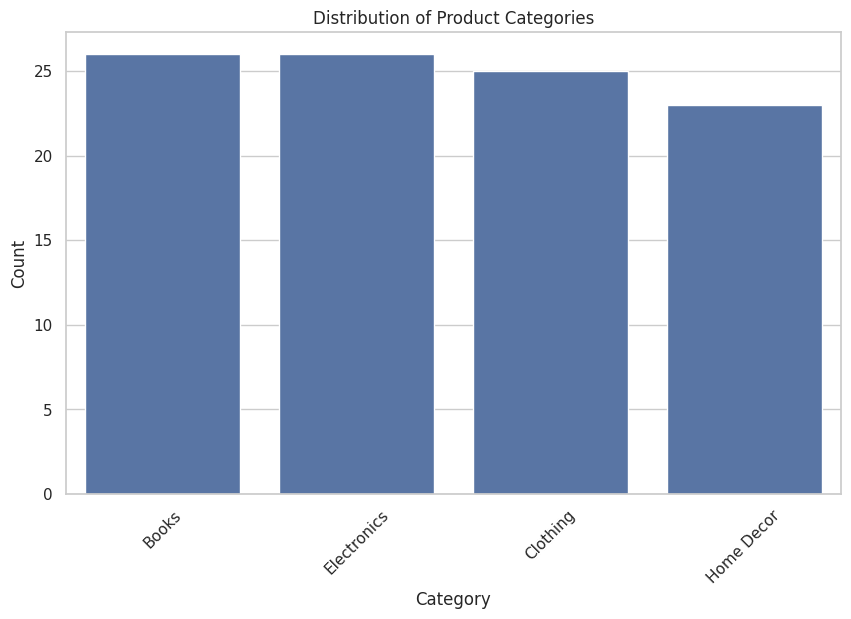

In [11]:
## Step 5: Perform Exploratory Analysis
### Distribution of Product Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

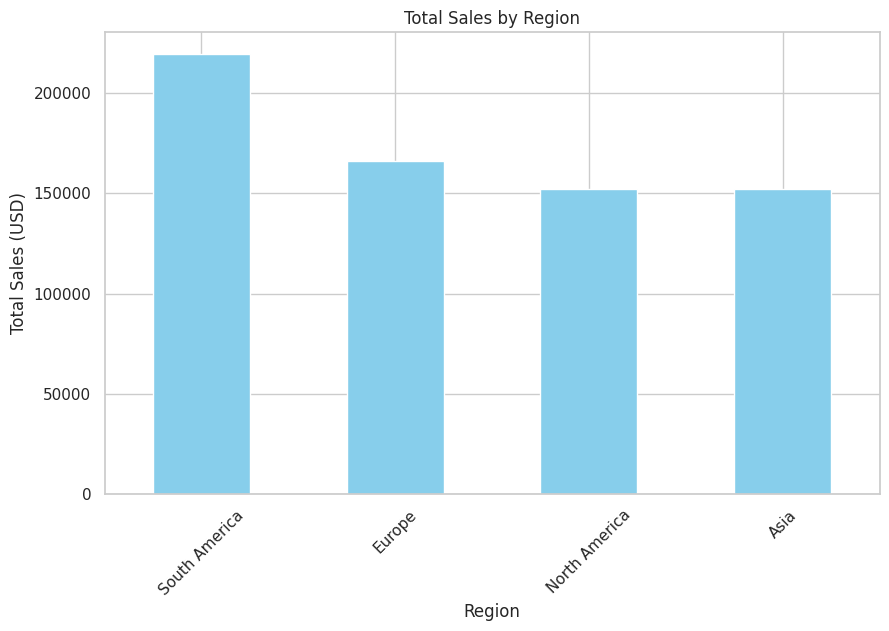

In [12]:
### Total Sales by Region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

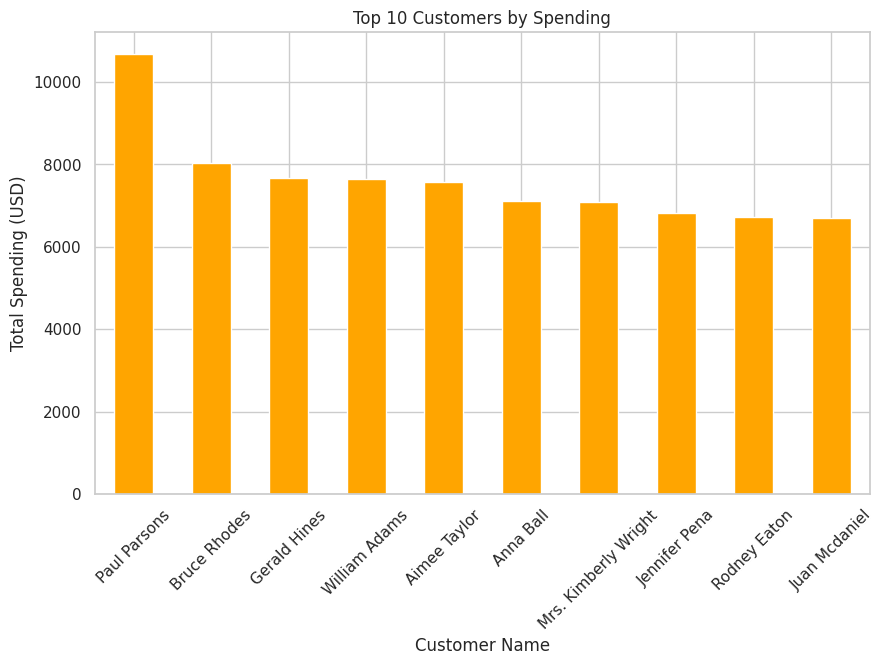

In [13]:
### Top 10 Customers by Spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

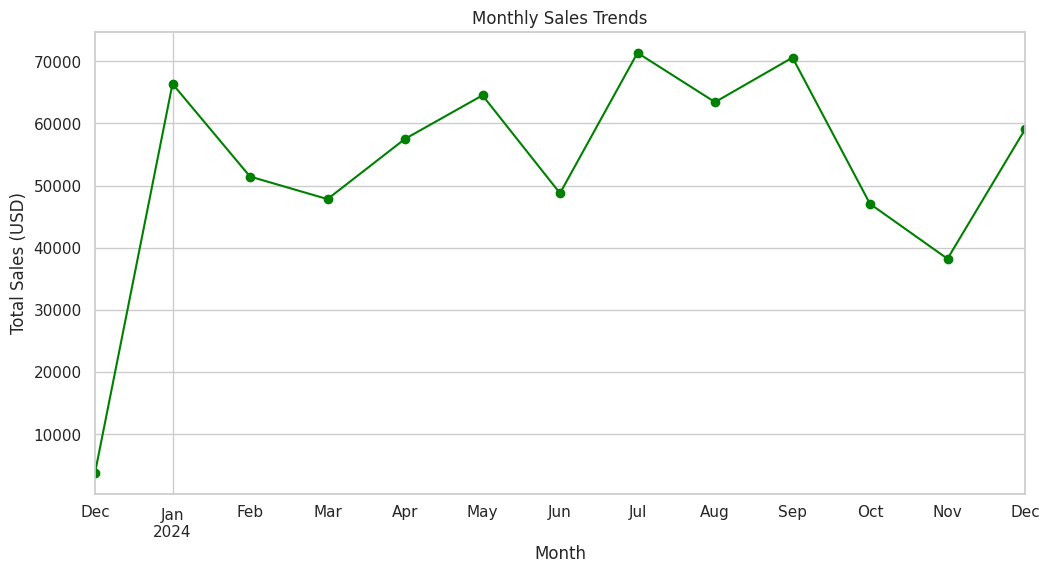

In [14]:
### Monthly Sales Trends
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()

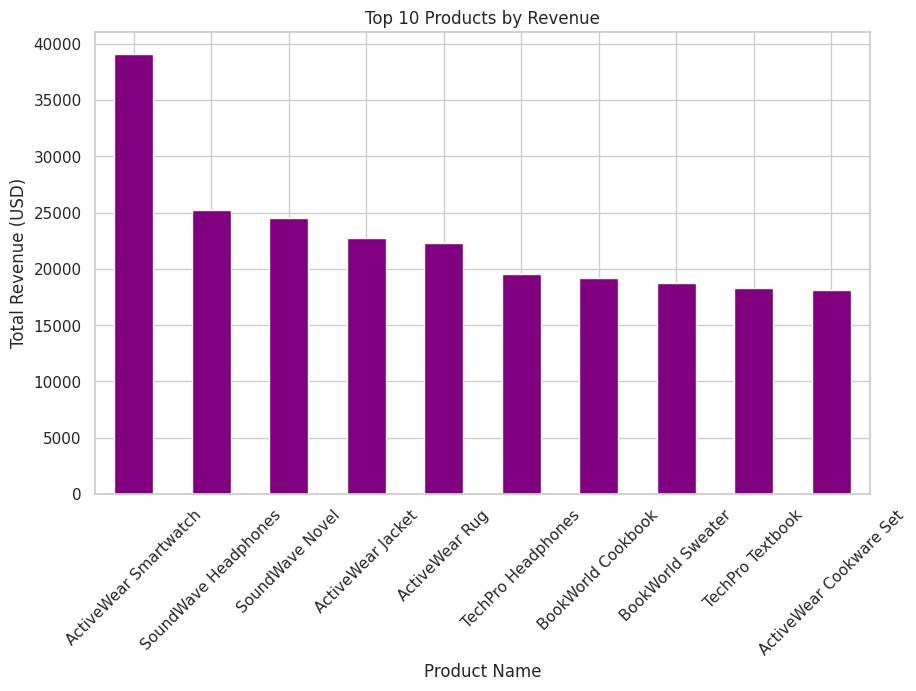

In [15]:
### Top 10 Products by Revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()